## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


Attribute Information:
#Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2 sex - student's sex (binary: 'F' - female or 'M' - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

#these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)



## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [661]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter("ignore")

In [662]:
std_df= pd.read_csv("students-data.csv",delimiter = ";")

In [663]:
std_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [664]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [665]:
std_df.index.name = "number"

In [667]:
#std_df.isnull().sum()  #For each column, it will provide the null value summation.
std_df.isnull().sum().sum() #sum of summation of all the columns having null values.


0

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [668]:
std_df.select_dtypes(exclude= 'number')
#std_df.select_dtypes(exclude= np.number)  #alternative way of doing the same

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [669]:
std_df_Ind = std_df.iloc[:,0:-1]
#std_df_Ind.head(5)
std_df_Ind.select_dtypes(include= 'number').var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
dtype: float64

In [670]:
std_df_bkup = std_df.copy()  #taking a backup copy for further processing
#std_df = std_df_bkup

In [671]:
std_df = std_df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'],axis=1)
#dropping all the columns having variance less than 1

In [673]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [674]:
std_df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].astype('category',inplace= True)


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


In [675]:
std_df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']]=std_df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']].apply(Le().fit_transform)


In [677]:
std_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:  

In [678]:
#std_df = std_df_bkup.copy()
#std_df.head()
std_df[['G1','G2','G3']].head()
#std_df_bkup.head()

,G1,G2,G3
number,,,
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [679]:
#creating a function to check if value >=10 and set as 1 otherwise 0.
fn = lambda x:1 if (x >= 10) else 0 
std_df[['G1','G2','G3']] = std_df[['G1','G2','G3']].applymap(fn)

In [680]:
std_df[['G1','G2','G3']].head()

,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [681]:
#Splitting Independent and Response variables.
X = std_df.iloc[:,0:-1]  #Independent
y = std_df.iloc[:,-1]  #Response variable

print(X.head(5))
print(y.head(5))

        school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

        ...  nursery  higher  internet  romantic  goout  Walc  health  \
number  ...                                                             
0       ...        1       1         0         0      4     1       3   
1       ...        0       1         1         0      3     1       3   
2       ...        1       1         1         0      2     3       3   
3       ...        1       1         1         1      2     1       5   
4       

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

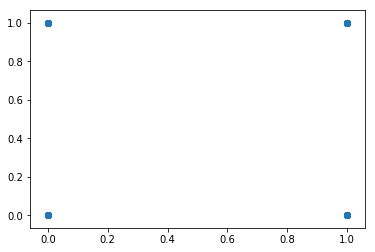

In [683]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x='G2',y = 'G3', data = std_df)  #since G2 and G3 are 0(fail) or 1(pass) based on previous condition in above cell, it shows points as below
plt.show()

#Understanding:  Below plot shows that there are 4 combination of students
1. Students passed in G2 also passed in G3
2. Students failed in G2 also passed in G3
3. Students failed in G2 also failed in G3
4. Students failed in G2 but passed in G3

In [684]:
stdetails = std_df_bkup.copy()

In [685]:

stdetails['G3'] = stdetails['G3'].apply(fn)

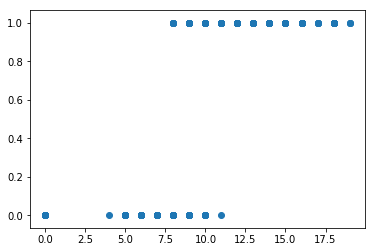

In [686]:

plt.scatter(x='G2',y='G3',data = stdetails) 
# plotting using original data.
# Students who grades are more than 12.5 in G3 have passed in G3.
# we could see some outliers.  Students with G2 between 3.0 - 10.0 have failed in G3.
# students who failed in G2 also failed in G3.

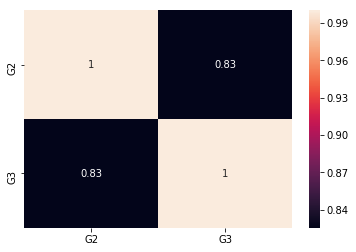

In [690]:
sns.heatmap(std_df[['G2','G3']].corr(),annot = True)


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

In [694]:
stdetails['school'].value_counts() 

GP    349
MS     46
Name: school, dtype: int64

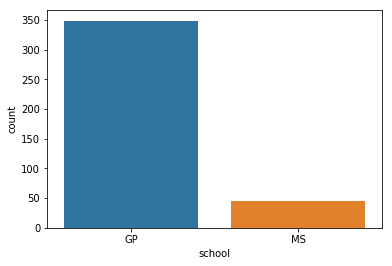

In [695]:
sns.countplot(x='school',data = stdetails)#Number of Students in each school Gabriel Pereira (GP) and Mousinho da Silveira (MS)

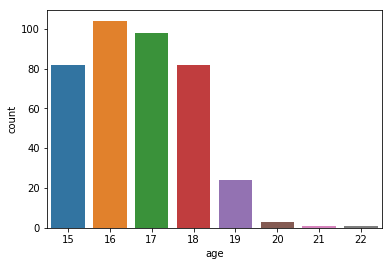

In [696]:
sns.countplot(x='age',data = stdetails)  #Age wise distribution plot

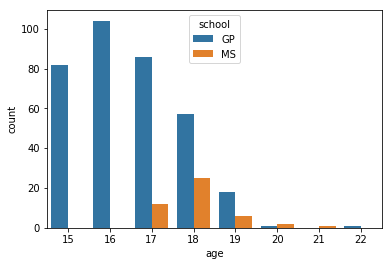

In [697]:
sns.countplot(x='age', hue = 'school',data = stdetails)  #Age wise distribution for students in both school.

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [698]:
std_df.shape
X_train,X_test,Y_train,Y_test = tts(X,y,train_size= 300,random_state=10000)

In [699]:
print(X_train.shape, Y_train.shape)

(300, 26) (300,)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [700]:
model= LogisticRegression().fit(X_train,Y_train)
y_Predict = model.predict(X_test)

train_score = model.score(X_train, Y_train)  
print("Training Score",train_score)
test_score = model.score(X_test, Y_test)  
print("Test score", test_score)



Training Score 0.91
Test score 0.9263157894736842


In [701]:

print(metrics.confusion_matrix(Y_test, y_Predict))

[[29  2]
 [ 5 59]]


In [702]:
print(metrics.accuracy_score(Y_test,y_Predict))
print(metrics.f1_score(Y_test,y_Predict))

0.9263157894736842
0.944


# Naive bayes with Iris data

### Import Iris.csv

In [703]:
IrisDS = pd.read_csv("Iris.csv")  #Importing iris dataset

In [704]:
IrisDS.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [705]:
X = IrisDS.iloc[:,:4]
y = IrisDS.iloc[:,4]

### Find the distribution of target variable (Class)

In [706]:
IrisDS['Class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

### Plot the distribution of target variable using histogram

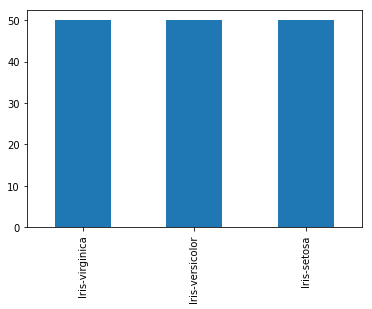

In [707]:
pd.value_counts(IrisDS["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

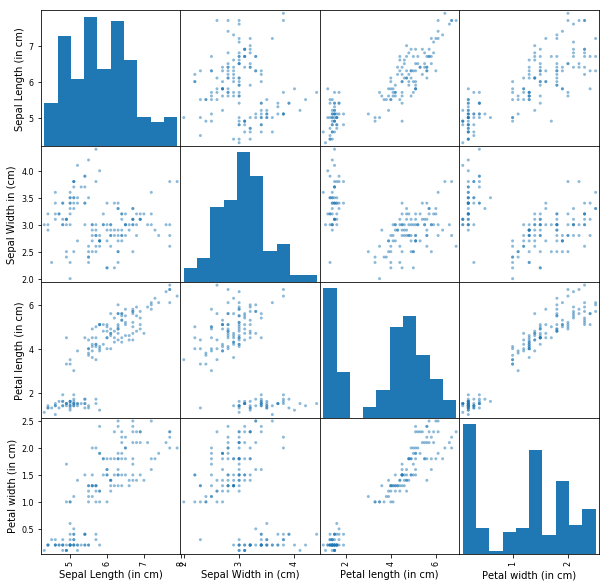

In [708]:
from pandas.plotting import scatter_matrix
#import plotly.express as px
scatter_matrix(IrisDS,figsize = (10,10))
plt.show()

In [ ]:
sepal length is closer to normal distribution.
sepal width have a normal distribution.
Petal length and petal width shows there are multiple process or sub classification (overlapping occurs)
sepal length and Sepal width are correlated.
Sepal Width and Petal Length are correlated. 

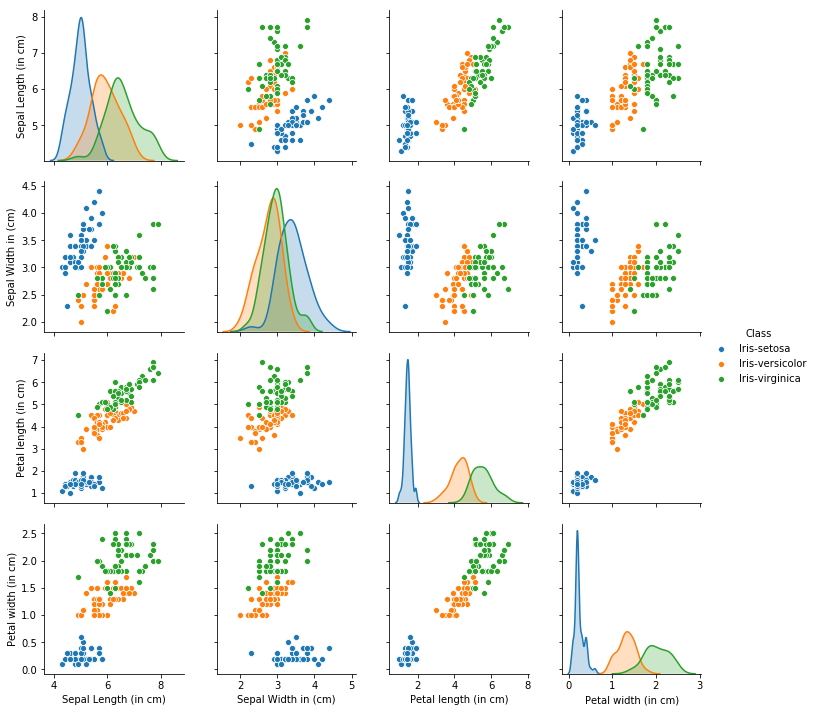

In [709]:
sns.pairplot(IrisDS,hue='Class') 
# scatter matrix is not differentiating between 3 types of flowers hence using pairplot for better visualization.  
#Sepal length and Sepal width relationship easily separates Setosa from other two types of flowers.
#Even other attribute relationship clearly separates Setosa from other other types of flowers.
# Virginca and Versicolor are overlapping with each other. 
# Setosa has a normalized curve and like to have petal_length and petal_width < 2 and sepal_length b/w 4-6cm

### Summary Statistics and explain insights for at least 2 variables

In [710]:
IrisDS.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Right Skewness observed in Petal Length and Petal Width.
Sepal Length has both mean and median to be almost close to each other. It should be close to or have a normal distribution.
Petal width looks to be a bad feature as it is mean is closer to lower limit and it could contain lot of outliers.


### Correlation among all variables and give your insights

In [711]:
IrisDS.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


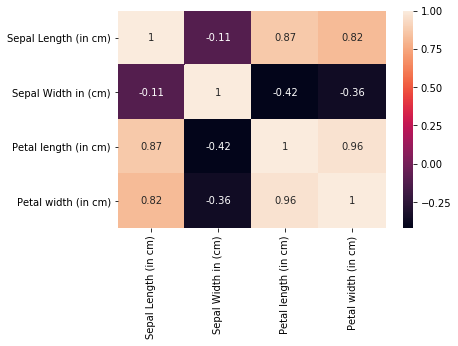

In [712]:
sns.heatmap(IrisDS.corr(),annot=True)
#Petal length and petal width are highly correlated. 
#Sepal length and sepal width are next highly correlated.


### Split data in Training and Validation in 80:20

In [713]:
#Changing target variable as categorical numeric.
IrisDS['Class'] = IrisDS.Class.astype('category')
IrisDS.Class = IrisDS[['Class']].apply(Le().fit_transform)

In [714]:
X = IrisDS.iloc[:,:4]
y = IrisDS.iloc[:,4]

In [715]:
#splitting data into 80:20 ratio
Xtrain,Xtest,Ytrain,Ytest = tts(X,y,test_size = 0.2,random_state = 3)  #seed limit is 0 - 2*32 -1

In [716]:
Ytrain.shape

(120,)

### Do Feature Scaling

In [717]:
from sklearn import preprocessing
Xtrain_Sld = preprocessing.scale(Xtrain)
Xtest_Sld = preprocessing.scale(Xtest)

### Train and Fit NaiveBayes Model

In [718]:
from sklearn.naive_bayes import GaussianNB as GNB
model = GNB().fit(Xtrain_Sld,Ytrain)
YPredict = model.predict(Xtest_Sld)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [719]:
print(model.score(Xtrain_Sld,Ytrain))
print(model.score(Xtest_Sld,Ytest))

0.95
0.9666666666666667


In [720]:
print("Accuracy Score of test data", metrics.accuracy_score(Ytest,YPredict))
print("Confusion Matrix:")
print(metrics.confusion_matrix(Ytest,YPredict))
print("Classification report:")
print(metrics.classification_report(Ytest,YPredict))

Accuracy Score of test data 0.9666666666666667
Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Conclusion: 
    
Naive Baye's can provide test accuracy of 96% in classifying the Iris flower into different types/species : Setosa,Virginca, Versicolor
-100% correctness in classifying setosa
-95% correctness in classifing vericolor and viriginica
